<a href="https://colab.research.google.com/github/anuravindra/SIC/blob/main/Logistic_Regression_with_streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mercedes_data.csv to mercedes_data.csv


In [ ]:
import pandas as pd

In [ ]:
df_mercedes = pd.read_csv("mercedes_data.csv")

In [ ]:
df_mercedes.head(3)

,Unnamed: 0,A,B,C,D
0,0,1.0,10.0,100.0,Mercedes
1,1,2.0,NaN,200.0,Ford
2,2,NaN,30.0,300.0,Maruti


In [ ]:
df_mercedes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10 non-null     int64  
 1   A           9 non-null      float64
 2   B           7 non-null      float64
 3   C           6 non-null      float64
 4   D           7 non-null      object 
dtypes: float64(3), int64(1), object(1)
memory usage: 532.0+ bytes


Data Cleaning of Data Preprocessing

In [ ]:
df_mercedes.isna().sum()

,0
Unnamed: 0,0
A,1
B,3
C,4
D,3


/tmp/ipython-input-255524577.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mercedes['A'])


<Axes: xlabel='A', ylabel='Density'>

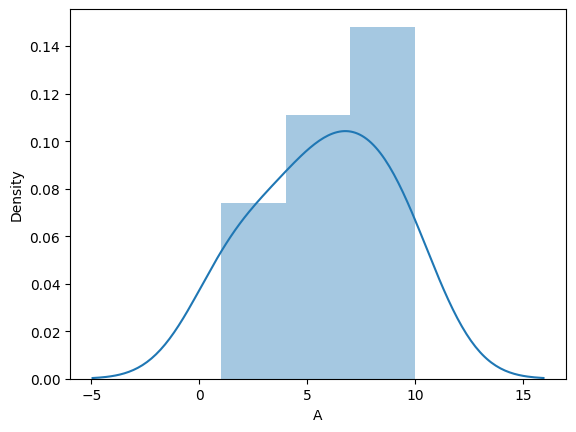

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df_mercedes['A'])

In [ ]:
df_mercedes['A'].fillna(df_mercedes['A'].mean(), inplace=True)

/tmp/ipython-input-2024208222.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mercedes['A'].fillna(df_mercedes['A'].mean(), inplace=True)


In [ ]:
df_mercedes.isna().sum()

,0
Unnamed: 0,0
A,0
B,3
C,4
D,3


/tmp/ipython-input-2111975346.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mercedes['A'])


<Axes: xlabel='A', ylabel='Density'>

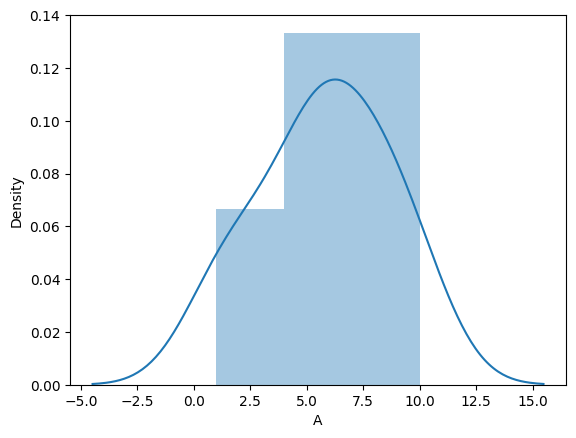

In [ ]:
sns.distplot(df_mercedes['A'])

In [ ]:
df_mercedes['C'].fillna(df_mercedes['C'].mean(), inplace=True)

/tmp/ipython-input-3671934942.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mercedes['C'].fillna(df_mercedes['C'].mean(), inplace=True)


/tmp/ipython-input-1547278130.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mercedes['C'])


<Axes: xlabel='C', ylabel='Density'>

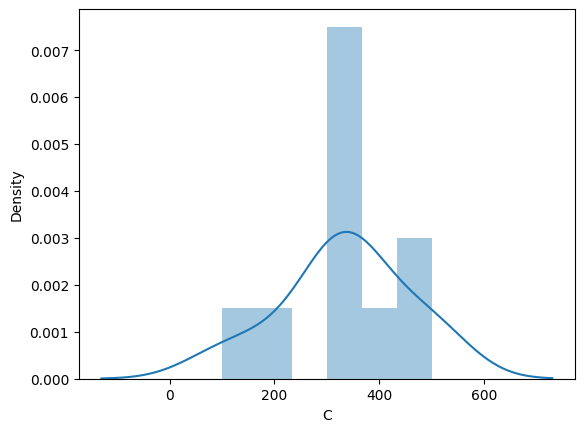

In [ ]:
sns.distplot(df_mercedes['C'])

In [ ]:
df_mercedes['D'].fillna(df_mercedes['D'].mode()[0], inplace=True)

/tmp/ipython-input-1902597358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mercedes['D'].fillna(df_mercedes['D'].mode()[0], inplace=True)


In [ ]:
df_mercedes['D'].value_counts()

,count
D,
Mercedes,6
Ford,2
Maruti,2


In [ ]:
new_data = df_mercedes.drop(['Unnamed: 0','B'],axis=1)

In [ ]:
new_data

,A,C,D
0,1.000000,100.000000,Mercedes
1,2.000000,200.000000,Ford
2,5.777778,300.000000,Maruti
3,4.000000,333.333333,Mercedes
4,5.000000,500.000000,Mercedes
5,6.000000,333.333333,Ford
6,7.000000,400.000000,Mercedes
7,8.000000,333.333333,Mercedes
8,9.000000,500.000000,Maruti
9,10.000000,333.333333,Mercedes


Data transformation

In [ ]:
df_mercedes['D'] = df_mercedes['D'].map({'Mercedes':1,'Ford':0,'Maruti':0})

In [ ]:
df_mercedes['D']

,D
0,1
1,0
2,0
3,1
4,1
5,0
6,1
7,1
8,0
9,1


In [ ]:
new_data

,A,C,D
0,1.000000,100.000000,Mercedes
1,2.000000,200.000000,Ford
2,5.777778,300.000000,Maruti
3,4.000000,333.333333,Mercedes
4,5.000000,500.000000,Mercedes
5,6.000000,333.333333,Ford
6,7.000000,400.000000,Mercedes
7,8.000000,333.333333,Mercedes
8,9.000000,500.000000,Maruti
9,10.000000,333.333333,Mercedes


In [ ]:
new_data['D'] = new_data['D'].map({'Mercedes':1,'Ford':0,'Maruti':0})

In [ ]:
new_data

,A,C,D
0,1.000000,100.000000,1
1,2.000000,200.000000,0
2,5.777778,300.000000,0
3,4.000000,333.333333,1
4,5.000000,500.000000,1
5,6.000000,333.333333,0
6,7.000000,400.000000,1
7,8.000000,333.333333,1
8,9.000000,500.000000,0
9,10.000000,333.333333,1


In [ ]:
X = new_data.drop(['D'],axis=1)
y = new_data['D']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score

In [ ]:
accuracy_score(y_test, y_predict)

0.25

In [ ]:
confusion_matrix(y_test, y_predict)

array([[1, 2],
       [1, 0]])

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.00      0.00      0.00         1

    accuracy                           0.25         4
   macro avg       0.25      0.17      0.20         4
weighted avg       0.38      0.25      0.30         4



In [ ]:
f1_score(y_test, y_predict)

0.0

Streamlit app

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

st.title("Mercedes Data Analysis and Logistic Regression Model")

# Sidebar for file upload
st.sidebar.header("Upload Data")
uploaded_file = st.sidebar.file_uploader("Upload the Mercedes Data CSV file", type="csv")

if uploaded_file is not None:
    # Load data
    df_mercedes = pd.read_csv(uploaded_file)

    # Create tabs for each exercise
    tab1, tab2, tab3, tab4, tab5, tab6 = st.tabs(["Data Overview", "Data Cleaning", "EDA", "Data Transformation", "Model Training", "Model Evaluation"])

    with tab1:
        st.header("Data Overview")
        st.write("### First 3 Rows")
        st.write(df_mercedes.head(3))
        st.write("### Data Information")
        st.write(df_mercedes.info())

    with tab2:
        st.header("Data Cleaning")
        st.write("Missing Values Before Cleaning")
        st.write(df_mercedes.isna().sum())

        # Data cleaning
        df_mercedes['A'].fillna(df_mercedes['A'].mean(), inplace=True)
        df_mercedes['C'].fillna(df_mercedes['C'].mean(), inplace=True)
        df_mercedes['D'].fillna(df_mercedes['D'].mode()[0], inplace=True)

        st.write("Missing Values After Cleaning")
        st.write(df_mercedes.isna().sum())

    with tab3:
        st.header("Exploratory Data Analysis (EDA)")

        st.subheader("Distribution of Feature 'A'")
        fig, ax = plt.subplots()
        sns.distplot(df_mercedes['A'], ax=ax)
        st.pyplot(fig)

        st.subheader("Distribution of Target Feature 'C'")
        fig, ax = plt.subplots()
        sns.distplot(df_mercedes['C'], ax=ax)
        st.pyplot(fig)

    with tab4:
        st.header("Data Transformation")

        st.write("Mapping categorical values in column 'D'")
        df_mercedes['D'] = df_mercedes['D'].map({'Mercedes': 1, 'Ford': 0, 'Maruti': 0})

        # Dropping unnecessary columns
        new_data = df_mercedes.drop(['Unnamed: 0', 'B'], axis=1)
        st.write(new_data.head(3))

    with tab5:
        st.header("Model Training")

        # Separating features and target
        X = new_data.drop(['D'], axis=1)
        y = new_data['D']

        # Splitting the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

        # Training the model
        model = LogisticRegression()
        model.fit(X_train, y_train)

        st.write("Logistic Regression model trained successfully!")

    with tab6:
        st.header("Model Evaluation")

        # Model prediction
        y_predict = model.predict(X_test)

        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_predict)
        f1 = f1_score(y_test, y_predict)
        confusion = confusion_matrix(y_test, y_predict)
        report = classification_report(y_test, y_predict)

        st.write(f"Accuracy Score: {accuracy:.2f}")
        st.write(f"F1 Score: {f1:.2f}")
        st.write("Confusion Matrix:")
        st.write(confusion)
        st.write("Classification Report:")
        st.text(report)

Writing app.py


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
! wget -q -O - ipv4.icanhazip.com

35.231.62.139


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦

⠧⠇⠏⠋⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.231.62.139:8501

⠼⠴⠦⠧⠇⠏your url is: https://puny-carrots-bathe.loca.lt
